In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy.stats import linregress
from decimal import Decimal
from matplotlib.ticker import PercentFormatter

In [49]:
# import csv-file
df = pd.read_csv(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Videoer\High concentration\Gauss on same frequency\Resonance-freq.csv', delimiter=',', encoding='utf-8')
t_star = df.iloc[:,2]
x_values = np.arange(0, len(t_star))

In [50]:
# make a gaussian
mean = np.mean(t_star)
std = np.std(t_star)
gauss = np.random.normal(mean, std, len(t_star))

# set x range
width = 0.45
xrange = [mean - width/2, mean + width/2]

In [51]:
# remove n data points
n = 75
x_values2 = x_values[n:]
t_star2 = t_star[n:]

# split data into two arrays
m = 200
x_values2_1 = x_values2[:m]
t_star2_1 = t_star2[:m]

x_values2_2 = x_values2[m+6:]
t_star2_2 = t_star2[m+6:]

# make linear regression
result2_1 = linregress(x_values2_1, t_star2_1)
slope2_1 = result2_1.slope
intercept = result2_1.intercept
y_hat2_1 = slope2_1 * x_values2_1 + intercept

result2_2 = linregress(x_values2_2, t_star2_2)
slope2_2 = result2_2.slope
intercept = result2_2.intercept
y_hat2_2 = slope2_2 * x_values2_2 + intercept

print(slope2_1)
print(slope2_2)

0.0005796098816622414
0.00048047581555719064


C:\Users\Phili\AppData\Local\Temp\ipykernel_21320\767149466.py:40: UserWarning: The label '_nolegend_' of <matplotlib.collections.PathCollection object at 0x0000028072C3C7F0> starts with '_'. It is thus excluded from the legend.
  ax[1].legend(['Excluded data', 'Used data', "_nolegend_", "_nolegend_", "Slope = " + f"{Decimal(str(slope2_1)):.1E}", "Slope = " + f"{Decimal(str(slope2_2)):.1E}"])
C:\Users\Phili\AppData\Local\Temp\ipykernel_21320\767149466.py:40: UserWarning: The label '_nolegend_' of <matplotlib.collections.PathCollection object at 0x0000028072C3C880> starts with '_'. It is thus excluded from the legend.
  ax[1].legend(['Excluded data', 'Used data', "_nolegend_", "_nolegend_", "Slope = " + f"{Decimal(str(slope2_1)):.1E}", "Slope = " + f"{Decimal(str(slope2_2)):.1E}"])


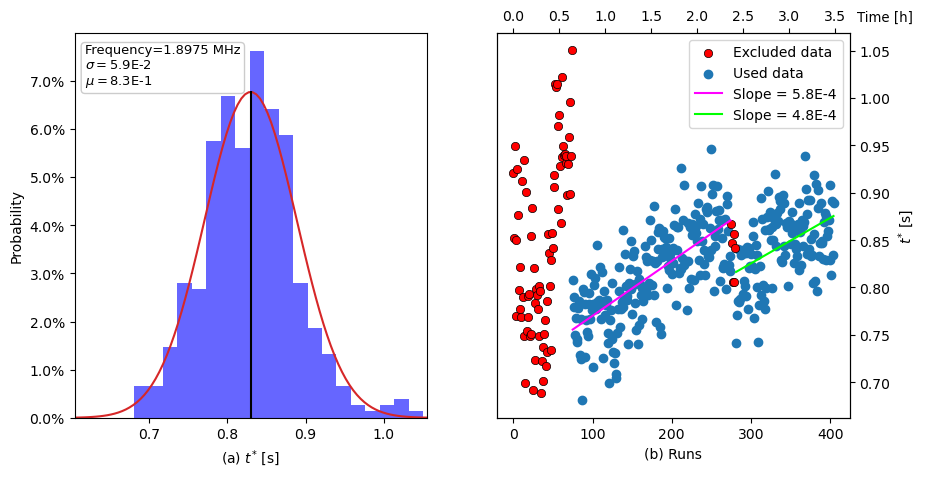

In [52]:
# create side by side sub plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

## plot left side subplot
# Plot the histogram
ax[0].hist(t_star, bins=int(np.floor(np.sqrt(len(t_star)))), density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the Gaussian distribution
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))
ax[0].plot(x, pdf, color='tab:red')
textstr = '\n'.join((r"Frequency=1.8975 MHz", r"$\sigma = $" + f"{Decimal(str(std)):.1E}", r"$\mu = $" + f"{Decimal(str(mean)):.1E}"))
ax[0].text(0.03, 0.97, textstr, transform=ax[0].transAxes, fontsize=9.4,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))

# Add labels and title
ax[0].set_xlabel(r'(a) $t^{\mathrm{*}}$ [s]')
ax[0].set_ylabel('Probability')
ax[0].vlines(x=mean, ymin=0, ymax=6.785, color='black')
ax[0].set_xlim(xrange[0], xrange[1])
ax[0].yaxis.set_major_formatter(PercentFormatter())

## plot right side subplot

# plot the scatter plot
ax[1].scatter(x_values[:n], t_star[:n], color = "red",edgecolors='black',linewidths=0.5)
ax[1].scatter(x_values[n:n+m], t_star[n:n+m], color = "tab:blue")
ax[1].scatter(x_values[n+m+6:], t_star[n+m+6:], color = "tab:blue")
ax[1].scatter(x_values[n+m:n+m+6], t_star[n+m:n+m+6], color = "red",edgecolors='black',linewidths=0.5)
ax[1].twiny().plot([0,3.48], [0.8,0.8], color="black", alpha=0)

ax[1].plot(x_values2_1, y_hat2_1, color="magenta")
ax[1].plot(x_values2_2, y_hat2_2, color="lime")

# Add labels and title
ax[1].set_xlabel('(b) Runs')
ax[1].set_ylabel(r'$t^{\mathrm{*}}$ [s]')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].legend(['Excluded data', 'Used data', "_nolegend_", "_nolegend_", "Slope = " + f"{Decimal(str(slope2_1)):.1E}", "Slope = " + f"{Decimal(str(slope2_2)):.1E}"])

ax[1].text(1.02, 1.06, "Time [h]", transform=ax[1].transAxes, fontsize=9.5,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0))
# save the plot
plt.savefig(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Images for Overleaf\Gauss-distribution.png', dpi=350,bbox_inches = "tight")


In [53]:
# merge to arrays
x_values = np.concatenate((x_values2_1, x_values2_2))
t_star = np.concatenate((t_star2_1 - y_hat2_1, t_star2_2 - y_hat2_2)) + np.mean(t_star2[:5])

In [54]:
# make a gaussian
mean = np.mean(t_star)
std = np.std(t_star)
gauss = np.random.normal(mean, std, len(t_star))

# make x range
xrange = [mean - width/2, mean + width/2]

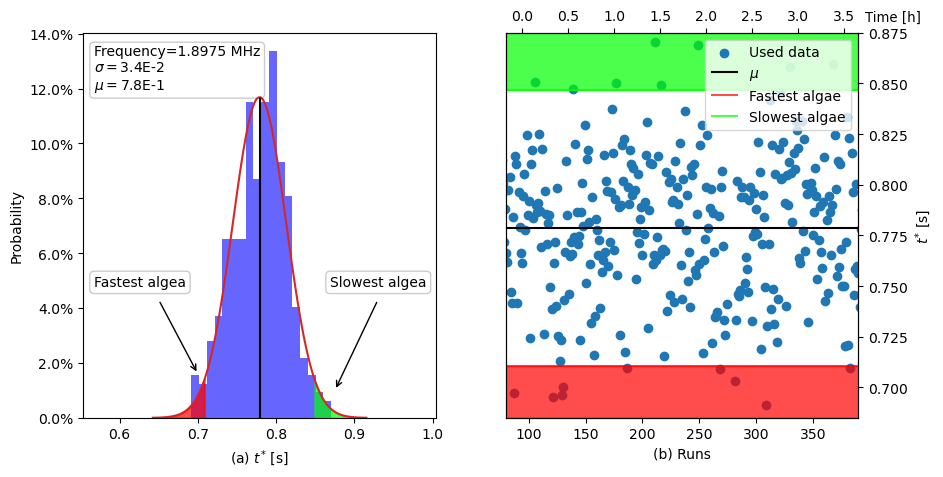

In [55]:
# create side by side sub plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

## plot left side subplot
# Plot the histogram
ax[0].hist(t_star, bins=int(np.floor(np.sqrt(len(t_star)))), density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the Gaussian distribution
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))
ax[0].plot(x, pdf, color='tab:red')
ax[0].fill_between(x, 0, pdf, where=x < mean - 2 * std, color='red', alpha=0.7)
ax[0].fill_between(x, 0, pdf, where=x > mean + 2 * std, color='lime', alpha=0.7)

# create the jazz
textstr = '\n'.join((r"Frequency=1.8975 MHz", r"$\sigma = $" + f"{Decimal(str(std)):.1E}", r"$\mu = $" + f"{Decimal(str(mean)):.1E}"))
ax[0].text(0.03, 0.97, textstr, transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
textstr = "Fastest algea"
ax[0].text(0.03, 0.37, textstr, transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
ax[0].annotate("", xy=(0.7, 1.6), xytext=(0.65, 4.3),
            arrowprops=dict(arrowstyle="->"))
textstr = "Slowest algea"
ax[0].text(0.7, 0.37, textstr, transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
ax[0].annotate("", xy=(0.875, 1), xytext=(0.93, 4.3),
            arrowprops=dict(arrowstyle="->"))

# Add labels and title
ax[0].set_xlabel(r'(a) $t^{\mathrm{*}}$ [s]')
ax[0].set_ylabel('Probability')
ax[0].vlines(x=mean, ymin=0, ymax=11.7, color='black')
ax[0].set_xlim(xrange[0], xrange[1])
ax[0].yaxis.set_major_formatter(PercentFormatter())

## plot right side subplot

# plot the scatter plot
ax[1].scatter(x_values, t_star, color="tab:blue")
ax[1].twiny().plot([0,3.48], [0.8,0.8], color="black", alpha=0)

# Add labels and title
ax[1].set_xlabel('(b) Runs')
ax[1].set_ylabel(r'$t^{\mathrm{*}}$ [s]')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].hlines(y=mean, xmin=x_values[0], xmax=x_values[-1], color='black')
ax[1].hlines(y=mean - 2 * std, xmin=x_values[0], xmax=x_values[-1], color='red', alpha=0.7)
ax[1].hlines(y=mean + 2 * std, xmin=x_values[0], xmax=x_values[-1], color='lime', alpha=0.7)
ax[1].fill_between(x_values, 0.685, mean - 2 * std, color='red', alpha=0.7)
ax[1].fill_between(x_values, mean + 2 * std, 0.875, color='lime', alpha=0.7)
ax[1].legend(['Used data', r"$\mu$", r"Fastest algae", r"Slowest algae"])
ax[1].set_xlim(80, 390)
ax[1].set_ylim(0.685, 0.875)
ax[1].text(1.02, 1.06, "Time [h]", transform=ax[1].transAxes, fontsize=9.5,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0))
# save the plot
plt.savefig(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Images for Overleaf\Gauss-distribution-corrected.png', dpi=350,bbox_inches = "tight")

In [56]:
# calculate difference in t_star for fits
first_t_star = y_hat2_1[0]
last_t_star = y_hat2_1[-1]

oneover_first = 1/first_t_star
oneover_last = 1/last_t_star

print(oneover_first)
print(oneover_last)

# calculate decrease

diff_oneover =  oneover_last - oneover_first

print(diff_oneover)

1.323524322102378
1.1482363644590738
-0.17528795764330418


In [57]:
#time duration
first_time = 17044486625899300E-7
last_time = 17044612068070100E-7

diff_time = last_time - first_time
print(diff_time/3600)

3.484504744410515
